# 과제


첨부파일 중 헌법개정안을 활용해 아래 분석을 시행 후 해석


1. 텍스트 전처리 

    - 파일 읽어와 형태소 태깅까지

2. 빈도 분석 

    - Counter 모듈을 이용한 빈도 수 기준 상위10개 '명사' 단어 추출과 워드클라우드 생성

3. 네트워크 분석

    - NetworkX 모듈을 이용해 빈도 수 기준 상위 15개 '명사' 단어로 네트워크를 생성
    - degree / betweenness / closeness / eigenvector centrality 분석을 수행 후 해석
    - 시각화

# 텍스트 전처리
## Text cleaning

In [1]:
import re
import konlpy

In [5]:
with open('./data/헌법개정안.txt', 'r', encoding='utf-8') as f:
    text = f.readlines()

In [3]:
text

['전문 \n',
 '\n',
 '유구한 역사와 전통에 빛나는 우리 대한국민은 3ㆍ1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4ㆍ19혁명, 부마민주항쟁과 5ㆍ18민주화운동, 6ㆍ10항쟁의 민주이념을 계승하고, 조국의 민주개혁과 평화 통일의 사명을 바탕으로 정의ㆍ인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자치와 분권을 강화하고, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치ㆍ경제ㆍ사회ㆍ문화의 모든 영역에서 개개인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상과 지역 간 균형발전을 도모하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 자연과의 공존 속에서 우리들과 미래 세대의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 9차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다. \n',
 '\n',
 '\n',
 '제1장 총강 \n',
 '\n',
 '\n',
 '제1조 ① 대한민국은 민주공화국이다. \n',
 '\n',
 '② 대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n',
 '\n',
 '③ 대한민국은 지방분권국가를 지향한다. \n',
 '\n',
 '\n',
 '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다. \n',
 '\n',
 '② 국가는 법률로 정하는 바에 따라 재외국민을 보호할 의무를 진다.\n',
 '\n',
 '\n',
 '제3조 ① 대한민국의 영토는 한반도와 그 부속도서(附屬島嶼)로 한다.\n',
 '\n',
 '② 대한민국의 수도에 관한 사항은 법률로 정한다. \n',
 '\n',
 '\n',
 '제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 바탕을 둔 평화 통일 정책을 수립하여 추진한다. \n',
 '\n',
 '\n',
 '제5조 ① 대한민국은 국제평화를 

In [8]:
text_strip = [i.strip() for i in text if i != '\n']

In [9]:
text_join = ' '.join(text_strip)

In [25]:
temp_filtered_content = re.sub(r'[①②③④⑤⑥⑦⑧⑨⑩]', '', text_join)
temp2_filtered_content = re.sub(r'제[0-9]+[항장조]',' ',temp_filtered_content) # 중간에 생략 됨
filtered_content = re.sub(r'[0-9]\.',' ',temp2_filtered_content)

print(filtered_content)

전문 유구한 역사와 전통에 빛나는 우리 대한국민은 3ㆍ1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4ㆍ19혁명, 부마민주항쟁과 5ㆍ18민주화운동, 6ㆍ10항쟁의 민주이념을 계승하고, 조국의 민주개혁과 평화 통일의 사명을 바탕으로 정의ㆍ인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자치와 분권을 강화하고, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치ㆍ경제ㆍ사회ㆍ문화의 모든 영역에서 개개인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상과 지역 간 균형발전을 도모하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 자연과의 공존 속에서 우리들과 미래 세대의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 9차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.   총강    대한민국은 민주공화국이다.  대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.  대한민국은 지방분권국가를 지향한다.    대한민국의 국민이 되는 요건은 법률로 정한다.  국가는 법률로 정하는 바에 따라 재외국민을 보호할 의무를 진다.    대한민국의 영토는 한반도와 그 부속도서(附屬島嶼)로 한다.  대한민국의 수도에 관한 사항은 법률로 정한다.   대한민국은 통일을 지향하며, 자유민주적 기본질서에 바탕을 둔 평화 통일 정책을 수립하여 추진한다.    대한민국은 국제평화를 유지하기 위하여 노력하고 침략적 전쟁을 부인한다.  국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며 그 정치적 중립성은 준수된다.    헌법에 따라 체결ㆍ공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.  외국인에게는 국제법과 조약으로 정하는 바에 따라 그 지위를 보장한다.    공무원은 국민 전체에게 봉사하며, 국민에 대하여 책임을 

## Tokenization, POS tagging, Lemmatization

konlpy의 Komoran 사용

In [26]:
komoran = konlpy.tag.Komoran()
komoran_morphs = komoran.pos(filtered_content)
print(komoran_morphs)

[('전문', 'NNG'), ('유구', 'XR'), ('하', 'XSA'), ('ㄴ', 'ETM'), ('역사', 'NNG'), ('와', 'JC'), ('전통', 'NNG'), ('에', 'JKB'), ('빛나', 'VV'), ('는', 'ETM'), ('우리', 'NP'), ('대하', 'VV'), ('ㄴ', 'ETM'), ('국민', 'NNP'), ('은', 'JX'), ('3', 'SN'), ('ㆍ', 'SP'), ('1', 'SN'), ('운동', 'NNP'), ('으로', 'JKB'), ('건립', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETM'), ('대한민국', 'NNP'), ('임시', 'NNG'), ('정부', 'NNG'), ('의', 'JKG'), ('법통', 'NNG'), ('과', 'JC'), ('불의', 'NNP'), ('에', 'JKB'), ('항거', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('4', 'SN'), ('ㆍ', 'SP'), ('19', 'SN'), ('혁명', 'NNP'), (',', 'SP'), ('부마민주항쟁', 'NNP'), ('과', 'JC'), ('5', 'SN'), ('ㆍ', 'SP'), ('18', 'SN'), ('민주화', 'NNP'), ('운동', 'NNP'), (',', 'SP'), ('6', 'SN'), ('ㆍ', 'SP'), ('10', 'SN'), ('항쟁', 'NNG'), ('의', 'JKG'), ('민주', 'NNP'), ('이념', 'NNG'), ('을', 'JKO'), ('계승', 'NNG'), ('하', 'XSV'), ('고', 'EC'), (',', 'SP'), ('조국', 'NNP'), ('의', 'JKG'), ('민주개혁', 'NNG'), ('과', 'JC'), ('평화', 'NNG'), ('통일', 'NNG'), ('의', 'JKG'), ('사명', 'NNG'), ('을', 'JKO'), ('바탕', 'NNG'), ('으로', 'JKB'), 

In [28]:
komoran_nouns = komoran.nouns(filtered_content)
print(komoran_nouns) # 사용된 명사

['전문', '역사', '전통', '국민', '운동', '건립', '대한민국', '임시', '정부', '법통', '불의', '항거', '혁명', '부마민주항쟁', '민주화', '운동', '항쟁', '민주', '이념', '계승', '조국', '민주개혁', '평화', '통일', '사명', '바탕', '정의', '인도', '동포애', '민족', '단결', '사회', '폐습', '불의', '타파', '자치', '분권', '강화', '자율', '조화', '바탕', '자유', '민주', '기본', '질서', '정치', '경제', '사회', '문화', '영역', '개개인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '균등', '향상', '지역', '간', '균형발전', '도모', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '자연', '공존', '속', '미래', '세대', '안전', '자유', '행복', '확보', '것', '다짐', '년', '7월 12일', '제정', '차', '개정', '헌법', '국회', '의결', '국민', '투표', '개정', '강', '대한민국', '민주공화국', '대한민국', '주권', '국민', '권력', '국민', '대한민국', '지방', '분권', '국가', '지향', '대한민국', '국민', '요건', '법률', '국가', '법률', '바', '재외국민', '보호', '의무', '대한민국', '영토', '한반도', '부속', '도서', '대한민국', '수도', '사항', '법률', '대한민국', '통일', '지향', '자유', '민주', '기본', '질서', '바탕', '평화', '통일', '정책', '수립', '추진', '대한민국', '국제', '평화', '유지', '노력', '침략', '전쟁', '부인', '국군', '국가', '안전', '보장', '국토방위', '신성', '의무', '수행', '사명', 

## remove stopwords

- 온라인에 불용어 사전을 만든 곳도 있으나, 사용하는 문맥에 따라 다르므로 사용에 유의 필요
- 한국어에서 한 글자(것, 때, 그, 시 등)는 대부분 의미가 없는 것들이 많아 한 글자도 지워주면 좋음

In [33]:
stopwords = [] # 필요 없어서 생략
for word in set(komoran_nouns):
    if word in stopwords or len(word) == 1:
        while word in komoran_nouns:
            komoran_nouns.remove(word)
   
print(len(komoran_nouns))
print((set(komoran_nouns)))

3608
{'복수', '공표', '확보', '사명', '신체', '체포', '장기간', '대학', '노동자', '제약', '도서', '현행범', '제한', '의원', '감사원장', '사용자', '사유', '한계', '공사', '부합', '참정권', '대사', '신임', '관장', '강화', '장의', '의견', '효력', '표현의 자유', '조성', '국회', '양성', '부의장', '삶의 질', '자와', '성장', '해제', '보조', '존엄', '예산', '심신', '대한민국의 경제', '방지', '참모총장', '사무', '공공단체', '해당', '우호', '보건', '검사', '초등', '상당', '국무위원', '수도', '감찰', '정당', '국가안전보장회의', '금지', '확립', '경자', '피의자', '정년', '동안', '위원', '지속', '발안', '감봉', '실업', '주체', '청소년', '총수', '정책', '노력', '3분', '징수', '사영', '회부', '통고', '면제', '특별법', '수정', '장소', '유전', '대외', '국정', '조국', '공영', '무상', '장애인', '우수', '임시회', '천재지변', '산림', '시정', '조세', '개발', '구성원', '자의', '명령', '규정', '침해', '형사', '통보', '파면', '원칙', '사람', '항쟁', '실질', '회기', '선거일', '제청', '포로', '생활', '동등', '예방', '감사', '재원', '창의', '품질', '공공', '윤리', '불의', '편성', '합리', '해임', '질병', '보안처분', '수준', '남은', '방해', '검찰', '전직', '연소자', '기준', '강요', '혁신', '선거구', '비상사태', '최소한', '대통령', '허가', '대한민국', '기능', '재정', '집행', '민주평화통일자문회의', '권력', '창설', '타파', '의무', '증인', '질문', '감형', '국유재산', '선임', '사후

# Keyword frequency analysis

빈도분석을 위한 Counter 모듈

In [35]:
from collections import Counter
count = Counter(komoran_nouns)
print(count)

Counter({'법률': 161, '대통령': 88, '국가': 81, '국회': 70, '국민': 58, '헌법': 50, '경우': 49, '지방': 48, '정부': 45, '사항': 40, '필요': 39, '권리': 33, '사람': 30, '법관': 28, '보장': 27, '시행': 23, '직무': 22, '국무총리': 22, '조직': 21, '이상': 21, '임명': 21, '경제': 20, '자치': 19, '정책': 19, '국무위원': 19, '위원': 19, '의무': 18, '국회의원': 18, '헌법재판소': 17, '임기': 17, '회의': 17, '감사': 17, '범위': 17, '권한': 17, '정당': 16, '선출': 16, '투표': 15, '보호': 15, '법원': 15, '자유': 14, '의결': 14, '수행': 14, '공무원': 14, '절차': 14, '선거': 14, '적의': 14, '사무': 14, '노력': 13, '조약': 13, '구성': 13, '구체': 13, '과반수': 13, '기본': 12, '개정': 12, '효력': 12, '위반': 12, '심판': 12, '요구': 12, '출석': 12, '찬성': 12, '탄핵': 12, '대한민국': 11, '정치': 11, '처분': 11, '동의': 11, '재판관': 11, '주민': 11, '사회': 10, '최고': 10, '안전': 10, '제정': 10, '유지': 10, '공포': 10, '형사': 10, '재판': 10, '제한': 10, '교육': 10, '예산': 10, '행정': 10, '득표자': 10, '체포': 9, '결정': 9, '의장': 9, '제출': 9, '국정': 9, '각부': 9, '명령': 9, '의회': 9, '당시': 9, '생활': 8, '운영': 8, '발전': 8, '이유': 8, '인정': 8, '구속': 8, '행위': 8, '기관': 8, '3분': 8, '심의': 8, '다음

In [36]:
print(count.most_common(10))

[('법률', 161), ('대통령', 88), ('국가', 81), ('국회', 70), ('국민', 58), ('헌법', 50), ('경우', 49), ('지방', 48), ('정부', 45), ('사항', 40)]


## word cloud

WordCloud 모듈 사용

In [37]:
from os import path

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [54]:
# 한글 폰트 위치
FONT_PATH = 'C:\\Users\\User\\AppData\\Local\\Microsoft\\Windows\\Fonts\\BMDOHYEON_ttf.ttf'

# generate() 는 하나의 string value를 입력 받음
noun_text = ' '.join(komoran_nouns)

In [61]:
wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, font_path=FONT_PATH, background_color='black')

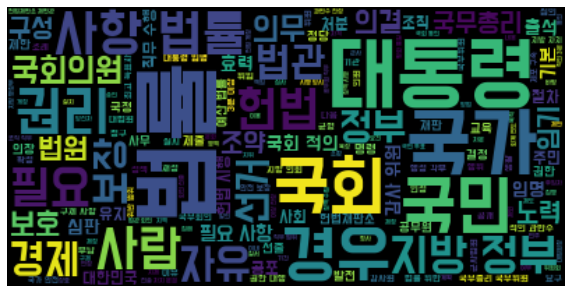

In [62]:
wordcloud.generate(noun_text) 

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 추가 내용 정리
### 미등록 단어 문제

komoran과 twitter를 이용해 미등록 단어 문제를 수작업으로 해결할 수 있지만, 미등록 단어를 추출해내는 모듈이 이미 존재
- (이상엽, 2018) [kornounextractor](https://github.com/sangyup-lee/korean_noun_extractor) : 형태론적 방법론 이용
- (김현중, 2018) [LRNounExtractor_v2](https://github.com/lovit) : 확률적 방법론 이용

> Twitter : ckonlpy의 Twitter 모듈 중 add_dictionary로 직접 추가 가능하나, 메모리 상에 존재하여 매번 새롭게 등록해야 함

In [41]:
from ckonlpy.tag import Twitter
twitter = Twitter()
twitter.add_dictionary(['추가할단어', '불용어명사'], 'Noun')

> Komoran : Notepad++를 이용하여 tab으로 분리된 txt 파일을 만들어 추가 가능

In [63]:
komoran2 = konlpy.tag.Komoran(userdic='./data/dict_myself.txt')

### docs Vectorization

- 문서 벡터화 작업: Binary, TF, TF*IDF

- ScikitLearn의 CountVectorizer(TF를 위함)와 TfidfVectorizer(TF*IDF를 위함) 사용

    > from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
    
    > from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

- 벡터(Dcoument Term Matrix)로 완성 후 유클리디안 거리와 코사인 유사도를 통해 문서 간 유사도 분석

# network analysis
networkx 사용 : 네트워크 분석 및 시각화

In [64]:
import networkx as nx

### networkx 패키지 활용 방법
1) g = nx.Graph()로 인스턴스 생성

2) g.add_nodes_from(리스트)로 노드 생성

3) g.edges()로 edge 공간 생성

4) g.add_edges_from([튜플, 튜플, 튜플, ...])로 edge 새성

In [64]:
g = nx.Graph()
g.add_nodes_from([1, 2, 3, 4, 5, 6])
print(g.nodes())

[1, 2, 3, 4, 5, 6]


In [65]:
g.edges()
g.add_edges_from([(1,3), (2,4), (2,5), (2,6), (3,4), (4,6), (5,6)])

In [66]:
print('node 리스트 : ', g.nodes())
print('edge 리스트 : ', g.edges())
print('node 개수 : ', g.number_of_nodes())
print('edge 개수 ; ', g.number_of_edges())

node 리스트 :  [1, 2, 3, 4, 5, 6]
edge 리스트 :  [(1, 3), (2, 4), (2, 5), (2, 6), (3, 4), (4, 6), (5, 6)]
node 개수 :  6
edge 개수 ;  7


- node와 edge에는 attribute와 weight라는 세부 속성을 추가할 수 있음
- 세부 속성을 추가하는 코드는 아래와 같음

In [67]:
# 노드에 attribute를 추가
g.nodes[1]['gender']='male'
g.nodes[2]['gender']='female'
g.nodes[3]['gender']='male'
g.nodes[4]['gender']='female'
g.nodes[5]['gender']='male'
g.nodes[6]['gender']='male'
print(nx.get_node_attributes(g, 'gender'))

{1: 'male', 2: 'female', 3: 'male', 4: 'female', 5: 'male', 6: 'male'}


In [68]:
# edge에 weight를 추가
g[1][3]['weight'] = 3
g[2][4]['weight'] = 1
g[2][5]['weight'] = 4
g[2][6]['weight'] = 3
g[3][4]['weight'] = 2
g[4][6]['weight'] = 3
g[5][6]['weight'] = 4

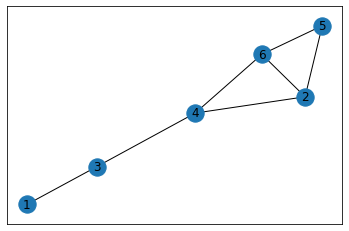

In [69]:
# NetworkX 패키지 이용해 시각화하기
# 시각화 할 때마다 랜덤하게 모양이 변화함
# 시각화 한 파일은 nx.write_graphml(g, '저장할 파일의 이름.graphml')로 저장 후 Gephi에서 더 예쁜 시각화 가능
nx.draw_networkx(g)
plt.show()

- NetworkX 패키지에서 함수를 이용해 중심도 역시 바로 구할 수 있음
- 중심도 별로 나타내고자 하는 의미가 다르기때문에 최종 결과값과 그 순위도 서로 다름

In [70]:
# 각 노드가 얼마나 많은 노드와 연결돼 있는지를 나타냄
nx.degree(g)

DegreeView({1: 1, 2: 3, 3: 2, 4: 3, 5: 2, 6: 3})

In [71]:
# 각 노드의 degree centrality를 나타냄
nx.degree_centrality(g)

{1: 0.2,
 2: 0.6000000000000001,
 3: 0.4,
 4: 0.6000000000000001,
 5: 0.4,
 6: 0.6000000000000001}

In [72]:
# 각 노드의 betweenness centrality를 나타냄
nx.betweenness_centrality(g)

{1: 0.0,
 2: 0.15000000000000002,
 3: 0.4,
 4: 0.6000000000000001,
 5: 0.0,
 6: 0.15000000000000002}

In [73]:
# 각 노드의 closeness centrality를 나타냄
nx.closeness_centrality(g)

{1: 0.38461538461538464,
 2: 0.625,
 3: 0.5555555555555556,
 4: 0.7142857142857143,
 5: 0.45454545454545453,
 6: 0.625}

In [74]:
# 각 노드의 eigenvector centrality를 나타냄
nx.eigenvector_centrality(g)

{1: 0.07902199743319213,
 2: 0.5299719499101774,
 3: 0.20983546432528058,
 4: 0.47818048045123035,
 5: 0.39915848301808887,
 6: 0.5299719499101774}

## 예시를 활용한 한국어 네트워크 분석

In [77]:
selected_words = [value[0] for index, value in enumerate(count.most_common(15))]
print(selected_words)

['법률', '대통령', '국가', '국회', '국민', '헌법', '경우', '지방', '정부', '사항', '필요', '권리', '사람', '법관', '보장']


In [78]:
import itertools


# 전체 텍스트에서 문장단위로 구분한 단어 추출
def get_sentences(content):
    text1 = re.sub(r'[^\.\?\!\s\w\d]', ' ', content)
    text1 = re.sub(r'([\.\?\!])', r'\1 ', text1)
    sentences = re.split(r'[\.\?\!]\s+', text1)
    komoran = konlpy.tag.Komoran(userdic='dict_3.txt')
    sentences = [komoran.nouns(sentence) for sentence in sentences if len(sentence)>0]
    return sentences



def add_ties(g, sentence):
#각 문장에 대해서, 각 문장에서 함께 사용되는 단어들 사이에 관계 형성하기

    if len(sentence) > 0 :

        selected_words=list(g.nodes())

        for pair in list(itertools.combinations(set(sentence), 2)):
            if pair[0] == pair[1]:
                continue
            if pair[0] in selected_words and pair[1] in selected_words:
                if pair in list(g.edges()) or (pair[1],pair[0]) in list(g.edges()): 
                    g[pair[0]][pair[1]]['weight'] += 1
                else:
                    g.add_edge(pair[0], pair[1], weight=1 )
        return g
    else:
        return g


    
def form_network(g, sentences):
#원본 데이터와 가장 많이 출현하는 명사 단어 x개를 사용해서 그 단어들 사이의 관계 형성하기
    for sentence in sentences:
        g = add_ties(g, sentence)
        
    return g


def do_kr_sna(sentences, selected_words):
    G = nx.Graph()
    G.add_nodes_from(selected_words)
    G = form_network(G, sentences)
    
    return G

In [79]:
sentences = get_sentences(text_join)
g = do_kr_sna(sentences, selected_words)

In [80]:
g.nodes()

NodeView(('법률', '대통령', '국가', '국회', '국민', '헌법', '경우', '지방', '정부', '사항', '필요', '권리', '사람', '법관', '보장'))

In [82]:
g['대통령']

AtlasView({'법률': {'weight': 24}, '국회': {'weight': 23}, '경우': {'weight': 15}, '정부': {'weight': 4}, '법관': {'weight': 4}, '헌법': {'weight': 10}, '국가': {'weight': 11}, '국민': {'weight': 4}, '사람': {'weight': 3}, '사항': {'weight': 5}, '필요': {'weight': 7}, '보장': {'weight': 2}, '지방': {'weight': 2}})

In [83]:
x = nx.degree_centrality(g)
sorted(x.items(), key = lambda kv: kv[1], reverse=True)

[('법률', 1.0),
 ('국회', 1.0),
 ('대통령', 0.9285714285714285),
 ('국가', 0.9285714285714285),
 ('경우', 0.9285714285714285),
 ('헌법', 0.8571428571428571),
 ('필요', 0.8571428571428571),
 ('국민', 0.7857142857142857),
 ('정부', 0.7857142857142857),
 ('권리', 0.7857142857142857),
 ('지방', 0.7142857142857142),
 ('사항', 0.7142857142857142),
 ('보장', 0.6428571428571428),
 ('사람', 0.5714285714285714),
 ('법관', 0.5)]

In [84]:
x = nx.closeness_centrality(g)
sorted(x.items(), key = lambda kv: kv[1], reverse=True)

[('법률', 1.0),
 ('국회', 1.0),
 ('대통령', 0.9333333333333333),
 ('국가', 0.9333333333333333),
 ('경우', 0.9333333333333333),
 ('헌법', 0.875),
 ('필요', 0.875),
 ('국민', 0.8235294117647058),
 ('정부', 0.8235294117647058),
 ('권리', 0.8235294117647058),
 ('지방', 0.7777777777777778),
 ('사항', 0.7777777777777778),
 ('보장', 0.7368421052631579),
 ('사람', 0.7),
 ('법관', 0.6666666666666666)]

In [85]:
x = nx.betweenness_centrality(g)
sorted(x.items(), key = lambda kv: kv[1], reverse=True)

[('법률', 0.033359894074179795),
 ('국회', 0.033359894074179795),
 ('대통령', 0.02878946450375022),
 ('경우', 0.0274685631828489),
 ('국가', 0.02006842363985221),
 ('헌법', 0.019471005185290904),
 ('사항', 0.014787196930054074),
 ('권리', 0.013178091749520322),
 ('필요', 0.00975968475968476),
 ('국민', 0.007287157287157287),
 ('정부', 0.005791430791430793),
 ('사람', 0.004766661909519052),
 ('지방', 0.004692529692529693),
 ('법관', 0.004517704517704518),
 ('보장', 0.003471528471528472)]

In [86]:
x = nx.eigenvector_centrality(g)
sorted(x.items(), key = lambda kv: kv[1], reverse=True)

[('법률', 0.30535691860342584),
 ('국회', 0.30535691860342584),
 ('국가', 0.2924229775375982),
 ('경우', 0.2873274356978337),
 ('대통령', 0.2852656110764303),
 ('필요', 0.27745994154382536),
 ('헌법', 0.2700811893047448),
 ('정부', 0.26021369515073656),
 ('국민', 0.2583291727545609),
 ('권리', 0.25161519279770844),
 ('지방', 0.23958633145023453),
 ('사항', 0.22579379696898716),
 ('보장', 0.21598548696154135),
 ('사람', 0.18739026333296682),
 ('법관', 0.16197867254878223)]

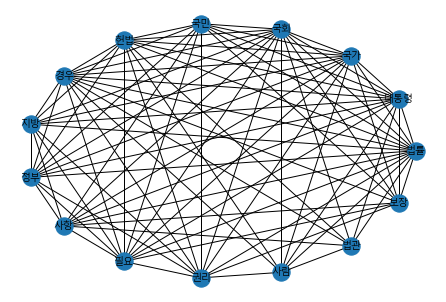

In [87]:
import matplotlib.font_manager as fm
font_name = 'Malgun Gothic'
pos = nx.shell_layout(g)
nx.draw(g, pos)
nx.draw_networkx_labels(g, pos, font_family = font_name, font_size=10)

plt.show()